In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('students_placement.csv')

In [3]:
data.shape

(300, 4)

In [4]:
data.head()

,cgpa,iq,profile_score,placed
0,5.97,106,61,0
1,6.83,113,77,0
2,6.60,110,61,0
3,5.54,113,68,0
4,6.84,102,67,0


In [5]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score

In [8]:
dtc = DT(max_depth=4).fit(x_train,y_train)

In [9]:
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8333333333333334

In [10]:
from sklearn.model_selection import GridSearchCV as GCV

In [11]:
params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [3,4,10,15],
    'min_samples_split' : [10, 20, 40, 50],
    'min_samples_leaf':[10, 20, 30, 40]
}

In [12]:
gcv = GCV(estimator=dtc, param_grid=params).fit(x,y)

In [13]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [14]:
gcv.best_score_

0.8866666666666667

In [15]:
dtc = DT(criterion='gini',
 max_depth=3,
 min_samples_leaf=20,
 min_samples_split=10)

In [16]:
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.85

In [17]:
import dtreeviz
from sklearn.tree import plot_tree

In [18]:
import matplotlib.pyplot as plt

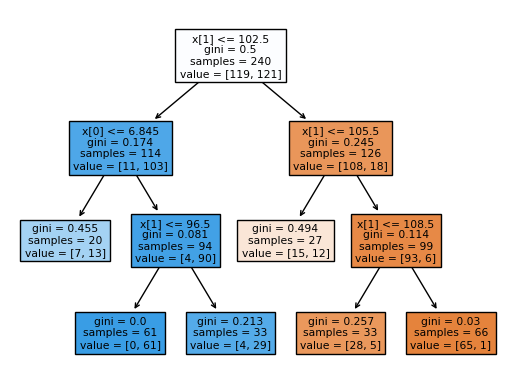

In [19]:
plot_tree(dtc, filled=True)
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


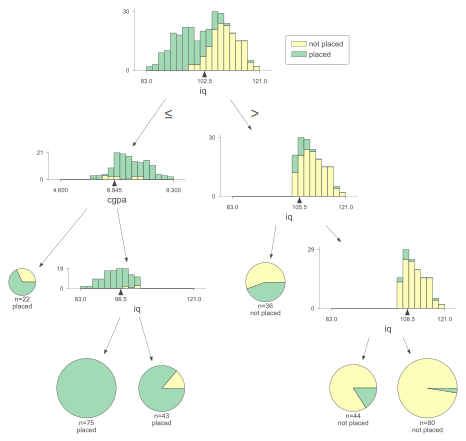

In [20]:
import dtreeviz
viz_model = dtreeviz.model(dtc,
                           X_train=x, y_train=y, feature_names=data.columns, class_names=['not placed','placed'])

viz_model.view(scale=1)

In [21]:
from mlxtend.plotting import plot_decision_regions

In [22]:
from sklearn.svm import SVC

In [23]:
svc = SVC().fit(x_train,y_train)

In [24]:
accuracy_score(y_test, svc.predict(x_test))

0.8333333333333334

In [25]:
from sklearn.ensemble import RandomForestClassifier as RC

In [26]:
rfc = RC(n_estimators=100).fit(x_train,y_train)

In [27]:
accuracy_score(y_test, rfc.predict(x_test))

0.8666666666666667

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean()

0.8633333333333335

In [30]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [31]:
gbc = GBC().fit(x_train,y_train)

In [32]:
cross_val_score(gbc,x,y,cv=10,scoring='accuracy').mean()

0.8600000000000001

In [33]:
accuracy_score(y_test, gbc.predict(x_test))

0.8666666666666667

In [34]:
accuracy_score(y_test,rfc.predict(x_test))

0.8666666666666667

In [36]:
import pickle
pickle.dump(rfc, open('model.pkl', 'wb'))